In [34]:
using CSV, DataFrames, Plots, Statistics, StatsPlots, Dates, StatsBase
df = CSV.read("accepted_2007_to_2018Q4.csv")
size(df)

(2260701, 151)

In [48]:
df = df[sample(axes(df,1), 100000; replace=false, ordered=true), :];

In [49]:
for i in names(df)
    println(i)
end

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
to

In [50]:
first(df, 5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate
,String,Missing,Float64⍰,Float64⍰,Float64⍰,String⍰,Float64⍰
1,68426545,missing,16000.0,16000.0,16000.0,60 months,12.88
2,68436666,missing,5000.0,5000.0,5000.0,36 months,13.44
3,68446769,missing,7000.0,7000.0,7000.0,36 months,7.49
4,68543413,missing,10000.0,10000.0,10000.0,36 months,12.88
5,68340446,missing,14000.0,14000.0,14000.0,60 months,14.85


In [51]:
columns = [:loan_amnt, :issue_d, :term, :int_rate, :installment, :grade,
            :sub_grade, :emp_title, :emp_length, :home_ownership,
            :annual_inc, :pymnt_plan, :purpose, :title,
            :zip_code, :addr_state, :dti, :delinq_2yrs,
            :earliest_cr_line, :inq_last_6mths, :mths_since_last_delinq,
            :mths_since_last_record, :open_acc, :pub_rec, :total_acc,
            :total_pymnt, :total_pymnt_inv, :recoveries, :last_pymnt_d,
            :last_pymnt_amnt, :next_pymnt_d, :last_credit_pull_d,
            :annual_inc_joint, :dti_joint, :acc_now_delinq, :tot_coll_amt,
            :tot_cur_bal, :open_acc_6m, :acc_open_past_24mths, :delinq_amnt];

In [52]:
data = df[:, columns];

In [53]:
for col in columns
    println(col, ": ", sum(ismissing.(data[:, col])))
end

loan_amnt: 1
issue_d: 1
term: 1
int_rate: 1
installment: 1
grade: 1
sub_grade: 1
emp_title: 7328
emp_length: 6451
home_ownership: 1
annual_inc: 1
pymnt_plan: 1
purpose: 1
title: 1081
zip_code: 1
addr_state: 1
dti: 71
delinq_2yrs: 2
earliest_cr_line: 2
inq_last_6mths: 2
mths_since_last_delinq: 51483
mths_since_last_record: 84192
open_acc: 2
pub_rec: 2
total_acc: 2
total_pymnt: 1
total_pymnt_inv: 1
recoveries: 1
last_pymnt_d: 124
last_pymnt_amnt: 1
next_pymnt_d: 59555
last_credit_pull_d: 8
annual_inc_joint: 94599
dti_joint: 94599
acc_now_delinq: 2
tot_coll_amt: 3056
tot_cur_bal: 3056
open_acc_6m: 38574
acc_open_past_24mths: 2159
delinq_amnt: 2


In [54]:
required = [:loan_amnt, :term, :int_rate, :installment, :grade,
            :sub_grade, :home_ownership, :annual_inc, :pymnt_plan,
            :zip_code, :addr_state, :dti, :issue_d, :delinq_2yrs,
            :earliest_cr_line, :inq_last_6mths, :open_acc, :pub_rec,
            :total_acc, :total_pymnt, :total_pymnt_inv, :recoveries,
            :last_pymnt_amnt, :last_credit_pull_d, :acc_now_delinq, :delinq_amnt];

In [55]:
data = dropmissing(data, required);

In [56]:
describe(data)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,loan_amnt,15046.6,1000.0,12800.0,40000.0
2,issue_d,,Apr-2008,,Sep-2018
3,term,,36 months,,60 months
4,int_rate,13.0927,5.31,12.62,30.99
5,installment,445.814,21.62,377.72,1715.42
6,grade,,A,,G
7,sub_grade,,A1,,G5
8,emp_title,,NSA Industries llc,,zone supervisor
9,emp_length,,1 year,,< 1 year


In [57]:
data[!, :issue_d] = Date.(data[:, :issue_d], Dates.DateFormat("u-y"));

In [58]:
features = [:loan_amnt, :issue_d, :term, :installment, :grade,
            :sub_grade, :emp_title, :emp_length, :home_ownership,
            :annual_inc, :pymnt_plan, :purpose, :title,
            :zip_code, :addr_state, :dti, :delinq_2yrs,
            :earliest_cr_line, :inq_last_6mths, :mths_since_last_delinq,
            :mths_since_last_record, :open_acc, :pub_rec, :total_acc,
            :total_pymnt, :total_pymnt_inv, :recoveries, :last_pymnt_d,
            :last_pymnt_amnt, :next_pymnt_d, :last_credit_pull_d,
            :annual_inc_joint, :dti_joint, :acc_now_delinq, :tot_coll_amt,
            :tot_cur_bal, :open_acc_6m, :acc_open_past_24mths, :delinq_amnt];

In [59]:
X = data[:, features]
Y = data[:, :int_rate];

In [60]:
viz = by(data, [:issue_d, :grade], :int_rate => x -> sum(x)/size(x, 1))
viz = sort(viz, [:issue_d, :grade]);

In [61]:
x_vals = unique(Dates.year.(viz[:, :issue_d]));
x_dates = Date.(x_vals);

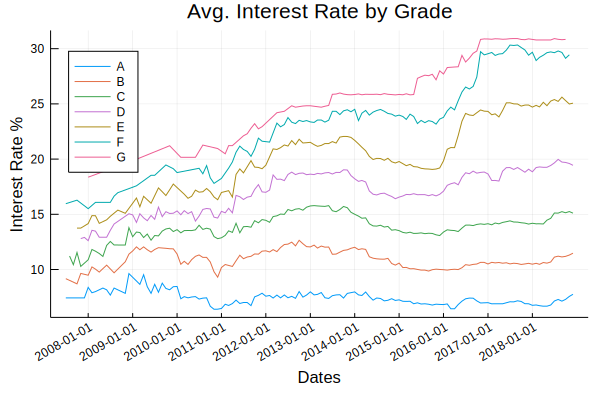

In [65]:
@df viz plot(:issue_d, :int_rate_function, group=:grade, xrotation=30, legend=:topleft, xticks=x_dates, xlabel="Dates", ylabel="Interest Rate %", title="Avg. Interest Rate by Grade")

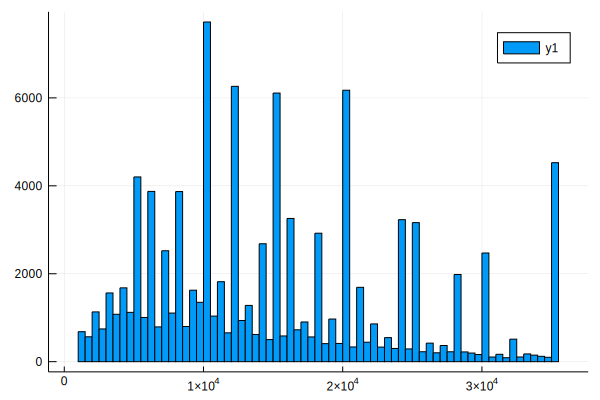

In [32]:
@df data histogram(:loan_amnt)